Sudoku solver using simulated annealing

In [25]:
import random
import numpy as np
from copy import deepcopy
import math
import matplotlib.pyplot as plt

size = 9




def print_sudoku(sudoku):
    for i in sudoku:
        print(i)


def generate_random_point(sudoku,row,col):
        while True:
            x, y = random.randint(row,row+2), random.randint(col, col+2)
            if sudoku[x][y]==0:
                return x, y

def read_file(path):
    lines = []
    with open(str(path), "r") as f:
        lines = f.readlines()
    sudoku = [[0]*size for _ in range(size)]


    cnt = 0
    for row, line in enumerate(lines):
        for col, char in enumerate(line):

            if char != 'x' and char != '\n' and char != '0':
                cnt += 1
                sudoku[row][col] = int(char)

    print("taken places = ", cnt)

    original = deepcopy(sudoku)
    for i in range(0,size, +3):
        for j in range(0,size, +3):
            generate_small_square(sudoku, i, j)
    return sudoku, original, cnt


def calc_cost(sudoku):

    cost = 0
    for i in range(size):
        cntrows = [0]*size
        cntcols = [0]*size
        for j in range(size):
            cntrows[sudoku[i][j]-1] += 1
            cntcols[sudoku[j][i]-1] += 1
        cost += sum(x>1 for x in cntrows) + sum(y>1 for y in cntcols)
    return cost

def swap(sudoku, p1, p2):
    x1, y1 = p1[0], p1[1]
    x2, y2 = p2[0], p2[1]

    sudoku[x1][y1], sudoku[x2][y2] = sudoku[x2][y2], sudoku[x1][y1]


def generate_next_state(original, sudoku,squareNums):

    square_to_change = random.randint(0,8)
    x, y = squareNums.get(square_to_change)

    p1x, p1y = generate_random_point(original, x, y)
    p2x, p2y = generate_random_point(original, x, y)
    while (p2x, p2y) == (p1x, p1y):
        p2x, p2y = generate_random_point(original, x, y)
    
    swap(sudoku, (p1x,p1y), (p2x,p2y))

    return (p1x,p1y), (p2x,p2y)

    


def generate_small_square(sudoku, row, col):

    existing_elements = []

    

    for i in range(row,row+3,1):
        for j in range(col, col+3, 1):
            if sudoku[i][j] != 0:
                existing_elements.append(sudoku[i][j])
    
    while len(existing_elements)<9:
        randNum = random.randint(1,9)
        if not randNum in existing_elements:
            x, y = generate_random_point(sudoku,row,col)

            sudoku[x][y] = randNum
            existing_elements.append(randNum)


def calcDeviation(original, sudoku, squareNums):
    
    tmp = []
    for i in range(200):
        tmp.append(calc_cost(sudoku))
        generate_next_state(original, sudoku, squareNums)

    return np.std(tmp)


def probability(new,old,T):
    if(T==0):
        return 0.0
    try:
        return math.exp(-(new-old)/T)
    except OverflowError:
        return 0.0
    except RuntimeWarning:
        return 0.0

def simulated_annealing(path, max_iterations = 1e6,temperature=lambda i: 0.99999**i):
    sudoku, original, taken_places = read_file(path)
    

    #key = number of square, value = column index, row index
    squareNumbers = {0: (0,0), 1: (0,3), 2: (0,6),
                    3: (3,0), 4: (3,3), 5: (3,6),
                    6: (6,0), 7: (6,3),8: (6,6)} 

    # T = calcDeviation(original, sudoku, squareNumbers)

    sudoku_cost = calc_cost(sudoku)

    for i in range(int(max_iterations)):

        T = temperature(i)
        p1,p2 = generate_next_state(original,sudoku,squareNumbers)
        new_cost = calc_cost(sudoku)

        if new_cost == 0:
            print('solved')
            print_sudoku(sudoku)
            return i, taken_places
            # break
        elif new_cost<sudoku_cost or random.random() < probability(new_cost,sudoku_cost,T):
            sudoku_cost = new_cost
        else:
            swap(sudoku, p1, p2)

    return max_iterations, taken_places


free places =  49
taken places =  32
[4, 8, 3, 1, 2, 9, 6, 7, 9]
[9, 6, 7, 3, 4, 5, 3, 2, 1]
[2, 5, 1, 8, 7, 6, 4, 8, 5]
[9, 2, 8, 1, 9, 2, 9, 4, 1]
[7, 3, 1, 5, 3, 4, 3, 6, 8]
[5, 4, 6, 7, 6, 8, 2, 5, 7]
[7, 3, 2, 6, 5, 9, 5, 7, 4]
[8, 9, 6, 2, 7, 3, 2, 8, 9]
[4, 1, 5, 4, 1, 8, 3, 1, 6]
solved
[4, 8, 3, 9, 2, 1, 6, 5, 7]
[9, 6, 7, 3, 4, 5, 8, 2, 1]
[2, 5, 1, 8, 7, 6, 4, 9, 3]
[5, 4, 8, 1, 3, 2, 9, 7, 6]
[7, 2, 9, 5, 6, 4, 1, 3, 8]
[1, 3, 6, 7, 9, 8, 2, 4, 5]
[3, 7, 2, 6, 8, 9, 5, 1, 4]
[8, 1, 4, 2, 5, 3, 7, 6, 9]
[6, 9, 5, 4, 1, 7, 3, 8, 2]

free places =  51
taken places =  30
[2, 5, 7, 1, 8, 9, 3, 7, 6]
[9, 6, 8, 2, 7, 4, 1, 8, 4]
[4, 3, 1, 5, 3, 6, 2, 5, 9]
[1, 5, 9, 1, 2, 5, 4, 5, 8]
[6, 8, 3, 8, 4, 9, 1, 7, 6]
[4, 7, 2, 7, 3, 6, 2, 3, 9]
[3, 6, 1, 3, 9, 7, 9, 4, 8]
[7, 2, 8, 8, 4, 2, 5, 6, 7]
[9, 5, 4, 6, 1, 5, 1, 2, 3]

free places =  53
taken places =  28
[6, 9, 8, 3, 9, 8, 9, 5, 7]
[7, 2, 4, 4, 2, 1, 1, 8, 4]
[5, 1, 3, 7, 6, 5, 3, 2, 6]
[1, 6, 4, 9, 3, 4, 2, 5, 6]
[2, 5, 8, 8,

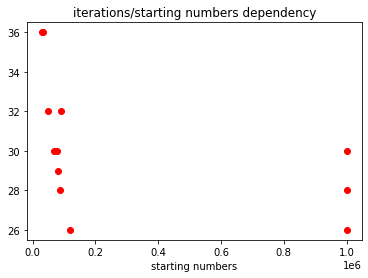

In [3]:
if __name__ == "__main__":
    iterations = []
    taken_places = []
    for i in range(1,13):
        string = 'sudokus/' + str(i) + '.txt'
        x,y = simulated_annealing(string)
        iterations.append(x)
        taken_places.append(y)
        print()

    plt.plot(iterations, taken_places, 'ro')
    plt.title("iterations/starting numbers dependency")
    plt.xlabel("iterations")
    plt.xlabel("starting numbers")
    plt.savefig("output")



Aby rozwiązać zadanie, kwadraty 3x3 wypełniam liczbami, które tam nie występują w miejscach, które są puste. Generacja kolejnego stanu polega na przestawieniu dwóch wcześniej wylosowanych miejsc w jednym z dziewięciu losowych kwadratów. Koszt planszy to suma powtórzeń elementów w wierszach i kolumnach, co powoduje, że rozwiązanie uzyskamy, kiedy koszt planszy będzie równy 0.
Symulowane wyżarzanie wyszukuje minima lokalne, dlatego w problemach ekstremalnie trudnych, gdzie takowych istnieje wiele, obliczenie rozwiązania jest możliwe, lecz zależy od losowości algorytmu, co widać na przedstawionym wykresie. Ilość iteracji algorytmu zależy od ilości wypełnionych na początku miejsc, jednakże jest możliwe, aby funkcja się zapętlała, dlatego ustawiono maksymalną liczbę iteracji jako 1 000 000. Dla 3 różnych testów o 30 wypełnionch polach, 2 razy ilość iteracji oscylowała w okolicach 100 000, natomiast jeden test osiągnął maksymalną liczbę.
Podobnie dla dwóch problemów trudnych o liczbie wypełnionych pól 26 algorytm, zarówno znalazł jak i nie znalazł rozwiązania.


Dla potwierdzenia poniżej przeprowadzono ponowne testy, dla identycznych plansz, gdzie wypełnionych jest 26 pól oraz próbę roziązania https://www.telegraph.co.uk/news/science/science-news/9359579/Worlds-hardest-sudoku-can-you-crack-it.html - 'najtrudniejszego sudoku na świecie'

free places =  55
taken places =  26
[8, 2, 1, 9, 7, 5, 9, 7, 2]
[4, 5, 9, 1, 2, 3, 4, 5, 8]
[7, 3, 6, 4, 8, 6, 1, 6, 3]
[9, 6, 8, 9, 1, 6, 3, 1, 6]
[4, 7, 5, 7, 5, 3, 7, 9, 4]
[1, 3, 2, 4, 2, 8, 2, 8, 5]
[8, 9, 1, 6, 8, 1, 3, 5, 7]
[6, 5, 7, 4, 3, 9, 1, 2, 8]
[4, 2, 3, 5, 2, 7, 6, 9, 4]

free places =  55
taken places =  26
[8, 6, 1, 9, 6, 8, 5, 7, 2]
[2, 5, 7, 1, 2, 3, 4, 3, 9]
[9, 3, 4, 7, 5, 4, 1, 6, 8]
[9, 2, 8, 7, 5, 4, 7, 1, 3]
[1, 7, 6, 2, 1, 6, 8, 9, 4]
[5, 3, 4, 8, 9, 3, 2, 6, 5]
[6, 9, 1, 6, 8, 2, 3, 5, 7]
[3, 2, 7, 4, 3, 9, 1, 2, 4]
[4, 8, 5, 1, 5, 7, 8, 6, 9]
solved
[8, 1, 4, 9, 7, 6, 5, 3, 2]
[6, 5, 9, 1, 2, 3, 4, 7, 8]
[7, 3, 2, 8, 5, 4, 1, 6, 9]
[9, 4, 8, 2, 6, 5, 3, 1, 7]
[2, 7, 5, 3, 4, 1, 8, 9, 6]
[1, 6, 3, 7, 9, 8, 2, 4, 5]
[3, 9, 1, 6, 8, 2, 7, 5, 4]
[5, 8, 7, 4, 3, 9, 6, 2, 1]
[4, 2, 6, 5, 1, 7, 9, 8, 3]

free places =  55
taken places =  26
[8, 1, 2, 9, 5, 6, 8, 9, 2]
[9, 5, 6, 1, 2, 3, 4, 7, 5]
[4, 3, 7, 7, 8, 4, 1, 6, 3]
[9, 2, 8, 9, 7, 1, 7, 4, 6]
[3, 7, 5, 5,

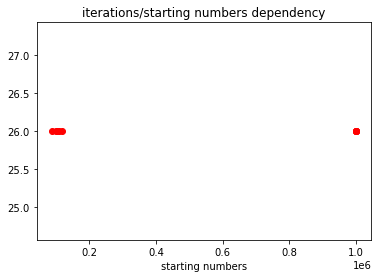

In [15]:
iterations = []
taken_places = []

for i in range(10):
    string = 'sudokus/10.txt'
    x,y = simulated_annealing(string,max_iterations=int(1e6))
    iterations.append(x)
    taken_places.append(y)
    print()

plt.plot(iterations, taken_places, 'ro')
plt.title("iterations/starting numbers dependency")
plt.xlabel("iterations")
plt.xlabel("starting numbers")
plt.savefig("output")


W celu zoptymalizowania oraz uniknięcia sytuacji kiedy generowane stany będą się powtarzać, lecz nie będą blisko dokładnego rozwiązania, każda próba może mieć maksymalnie 800 000 iteracji.

In [35]:
b = 8e5
for i in range(int(1e4)):
    string = 'sudokus/hardest.txt'
    x,y = simulated_annealing(string,max_iterations=int(b))
    if x < b-1:
        break

    print(i+1, "th try")


taken places =  21
1 th try
taken places =  21
2 th try
taken places =  21
3 th try
taken places =  21
4 th try
taken places =  21
solved
[8, 1, 2, 7, 5, 3, 6, 4, 9]
[9, 4, 3, 6, 8, 2, 1, 7, 5]
[6, 7, 5, 4, 9, 1, 2, 8, 3]
[1, 5, 4, 2, 3, 7, 8, 9, 6]
[3, 6, 9, 8, 4, 5, 7, 2, 1]
[2, 8, 7, 1, 6, 9, 5, 3, 4]
[5, 2, 1, 9, 7, 4, 3, 6, 8]
[4, 3, 8, 5, 2, 6, 9, 1, 7]
[7, 9, 6, 3, 1, 8, 4, 5, 2]


Algorytm rozwiązał najtrudniejsze, według The Telegraph, sudoku z wypełnionymi tylko 21 miejscami, co pozwala sądzić, że jest w stanie w skończonym czasie rozwiązać każde inne sudoku.